In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the input data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)  # Add the channel dimension
test_images = test_images.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


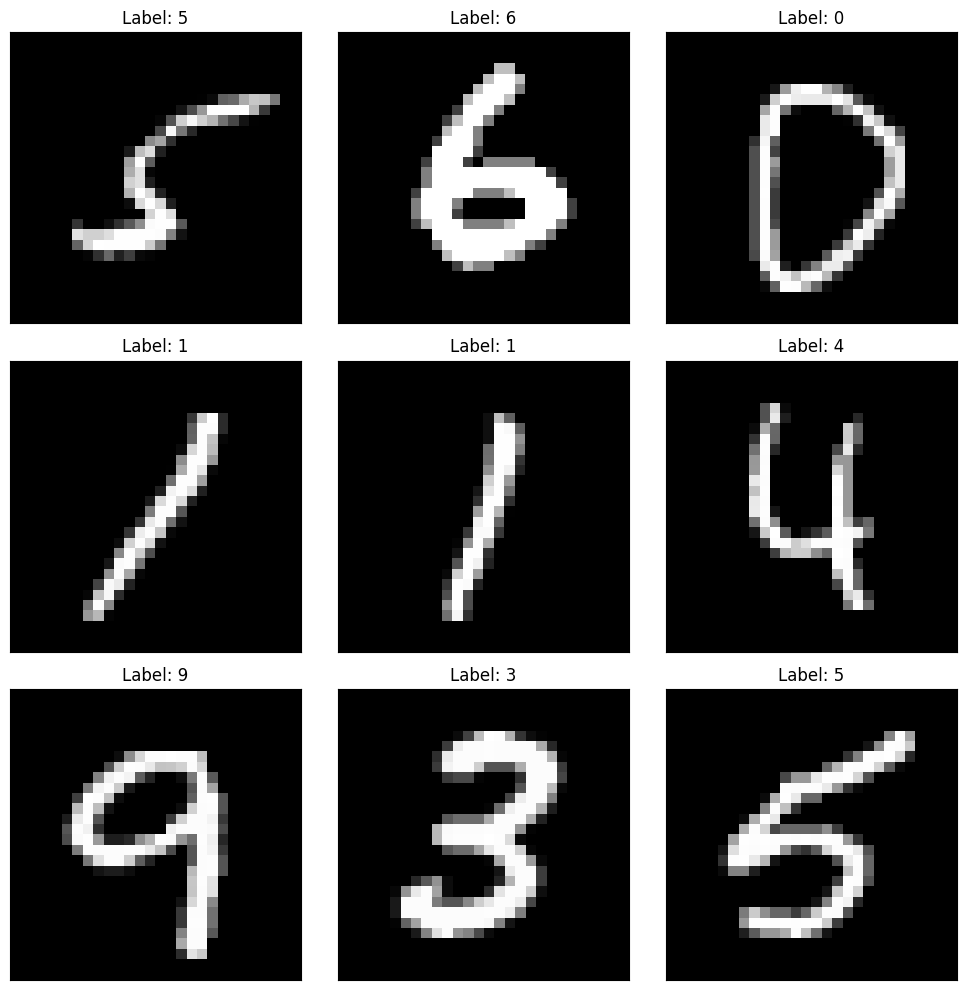

In [30]:
# Plot some images from the dataset with black and white colormap
def plot_images(images, labels, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)  # Create a 3x3 grid
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')  # Use 'gray' colormap for black and white
        plt.title(f"Label: {labels[i]}")
    plt.tight_layout()
    plt.show()

# Call the function to plot images in black and white
plot_images(train_images, train_labels)


In [3]:
# Define the CNN model
model = keras.Sequential([
    # First Convolutional Layer with 32 filters and a 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer with 64 filters and a 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),

    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),

    # Flatten the 2D feature maps to a 1D array
    layers.Flatten(),

    # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),

    # Add another dense layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),

    # Add the output layer with 10 units (one for each class) and softmax activation
    layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
learning_rate = 0.00005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Combine training and testing data
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# First, split the data into 60% training and 40% for validation+testing
train_images, val_test_images, train_labels, val_test_labels = train_test_split(
    images, labels, test_size=0.4, random_state=42
)

# Now split the remaining 40% into 20% validation and 20% testing
val_images, test_images, val_labels, test_labels = train_test_split(
    val_test_images, val_test_labels, test_size=0.5, random_state=42
)

# Train the model using the explicit validation set
history = model.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(val_images, val_labels),
    batch_size=32,
    verbose=2
)

Epoch 1/20
1313/1313 - 15s - 11ms/step - accuracy: 0.8200 - loss: 0.6517 - val_accuracy: 0.9379 - val_loss: 0.2238
Epoch 2/20
1313/1313 - 3s - 3ms/step - accuracy: 0.9513 - loss: 0.1706 - val_accuracy: 0.9612 - val_loss: 0.1387
Epoch 3/20
1313/1313 - 5s - 4ms/step - accuracy: 0.9655 - loss: 0.1202 - val_accuracy: 0.9701 - val_loss: 0.1051
Epoch 4/20
1313/1313 - 4s - 3ms/step - accuracy: 0.9713 - loss: 0.0968 - val_accuracy: 0.9734 - val_loss: 0.0889
Epoch 5/20
1313/1313 - 4s - 3ms/step - accuracy: 0.9752 - loss: 0.0823 - val_accuracy: 0.9738 - val_loss: 0.0849
Epoch 6/20
1313/1313 - 3s - 2ms/step - accuracy: 0.9789 - loss: 0.0714 - val_accuracy: 0.9781 - val_loss: 0.0720
Epoch 7/20
1313/1313 - 4s - 3ms/step - accuracy: 0.9806 - loss: 0.0636 - val_accuracy: 0.9809 - val_loss: 0.0650
Epoch 8/20
1313/1313 - 8s - 6ms/step - accuracy: 0.9830 - loss: 0.0578 - val_accuracy: 0.9830 - val_loss: 0.0594
Epoch 9/20
1313/1313 - 4s - 3ms/step - accuracy: 0.9840 - loss: 0.0528 - val_accuracy: 0.9834 

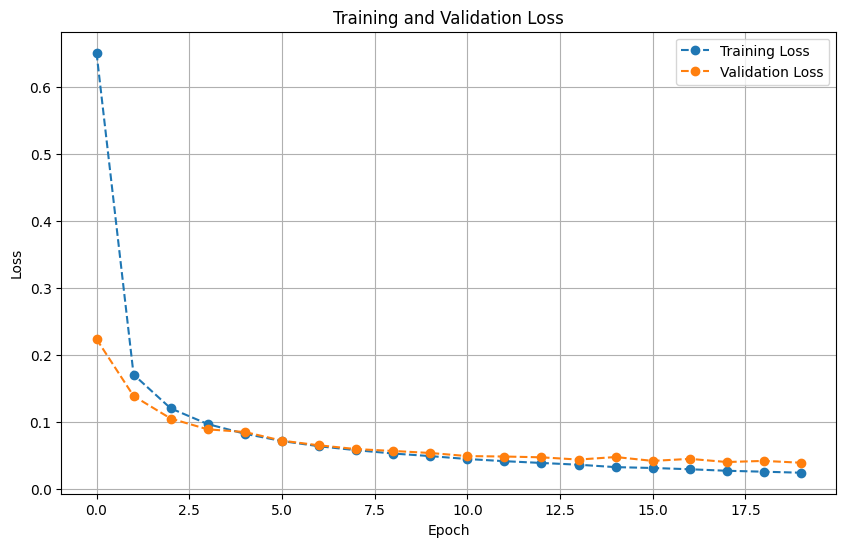

In [6]:
import matplotlib.pyplot as plt
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9879 - loss: 0.0427
Test Loss: 0.050285957753658295
Test Accuracy: 0.9851428866386414


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Shape of test_labels: (14000,)
Classification Report as Table:

              precision    recall  f1-score       support
Class 0        0.992210  0.987315  0.989756   1419.000000
Class 1        0.990701  0.994400  0.992547   1607.000000
Class 2        0.989826  0.970777  0.980209   1403.000000
Class 3        0.984733  0.987474  0.986101   1437.000000
Class 4        0.992401  0.984917  0.988645   1326.000000
Class 5        0.975533  0.989592  0.982512   1249.000000
Class 6        0.991105  0.989637  0.990370   1351.000000
Class 7        0.978652  0.985887  0.982256   1488.000000
Class 8        0.978740  0.977255  0.977997   1319.000000
Class 9        0.976596  0.982869  0.979723   1401.000000
accuracy       0.985143  0.985143  0.985143      0.985143
macro avg      0.985049  0.985012  0.985012  14000.000000
weighted avg   0.985181  0.985143  0.985143  14000.000000


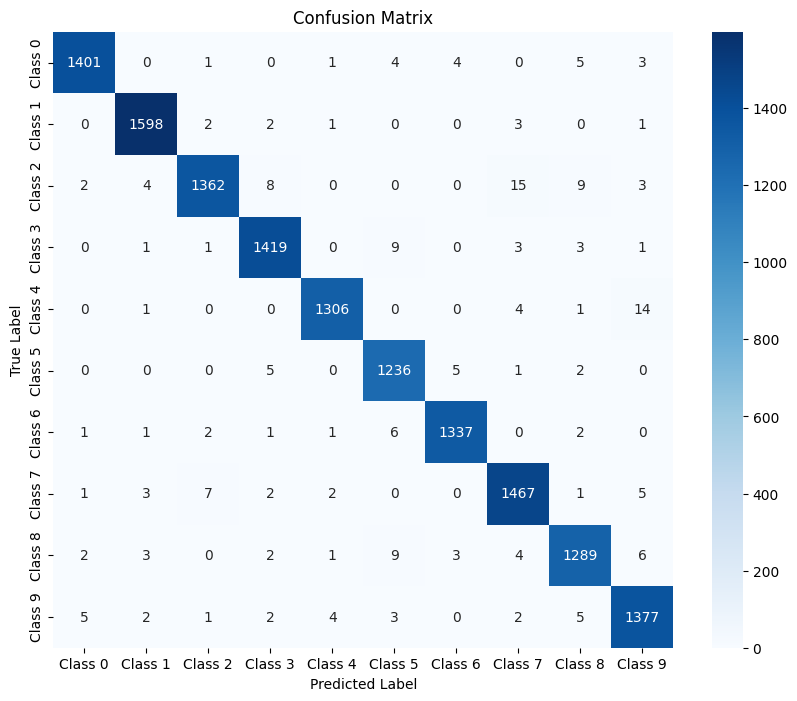

In [8]:
# Get predictions for the test set
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)  # Get class labels

# Shape of test_labels is already 1D (not one-hot encoded)
print("Shape of test_labels:", test_labels.shape)
test_labels_classes = test_labels  # It's already in class label format

# Generate classification report
report_dict = classification_report(test_labels_classes, test_predictions_classes,
                                     target_names=[f'Class {i}' for i in range(10)],
                                     output_dict=True)

# Convert the report to a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the report as a table
print("Classification Report as Table:\n")
print(report_df)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels_classes, test_predictions_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {i}' for i in range(10)],
            yticklabels=[f'Class {i}' for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


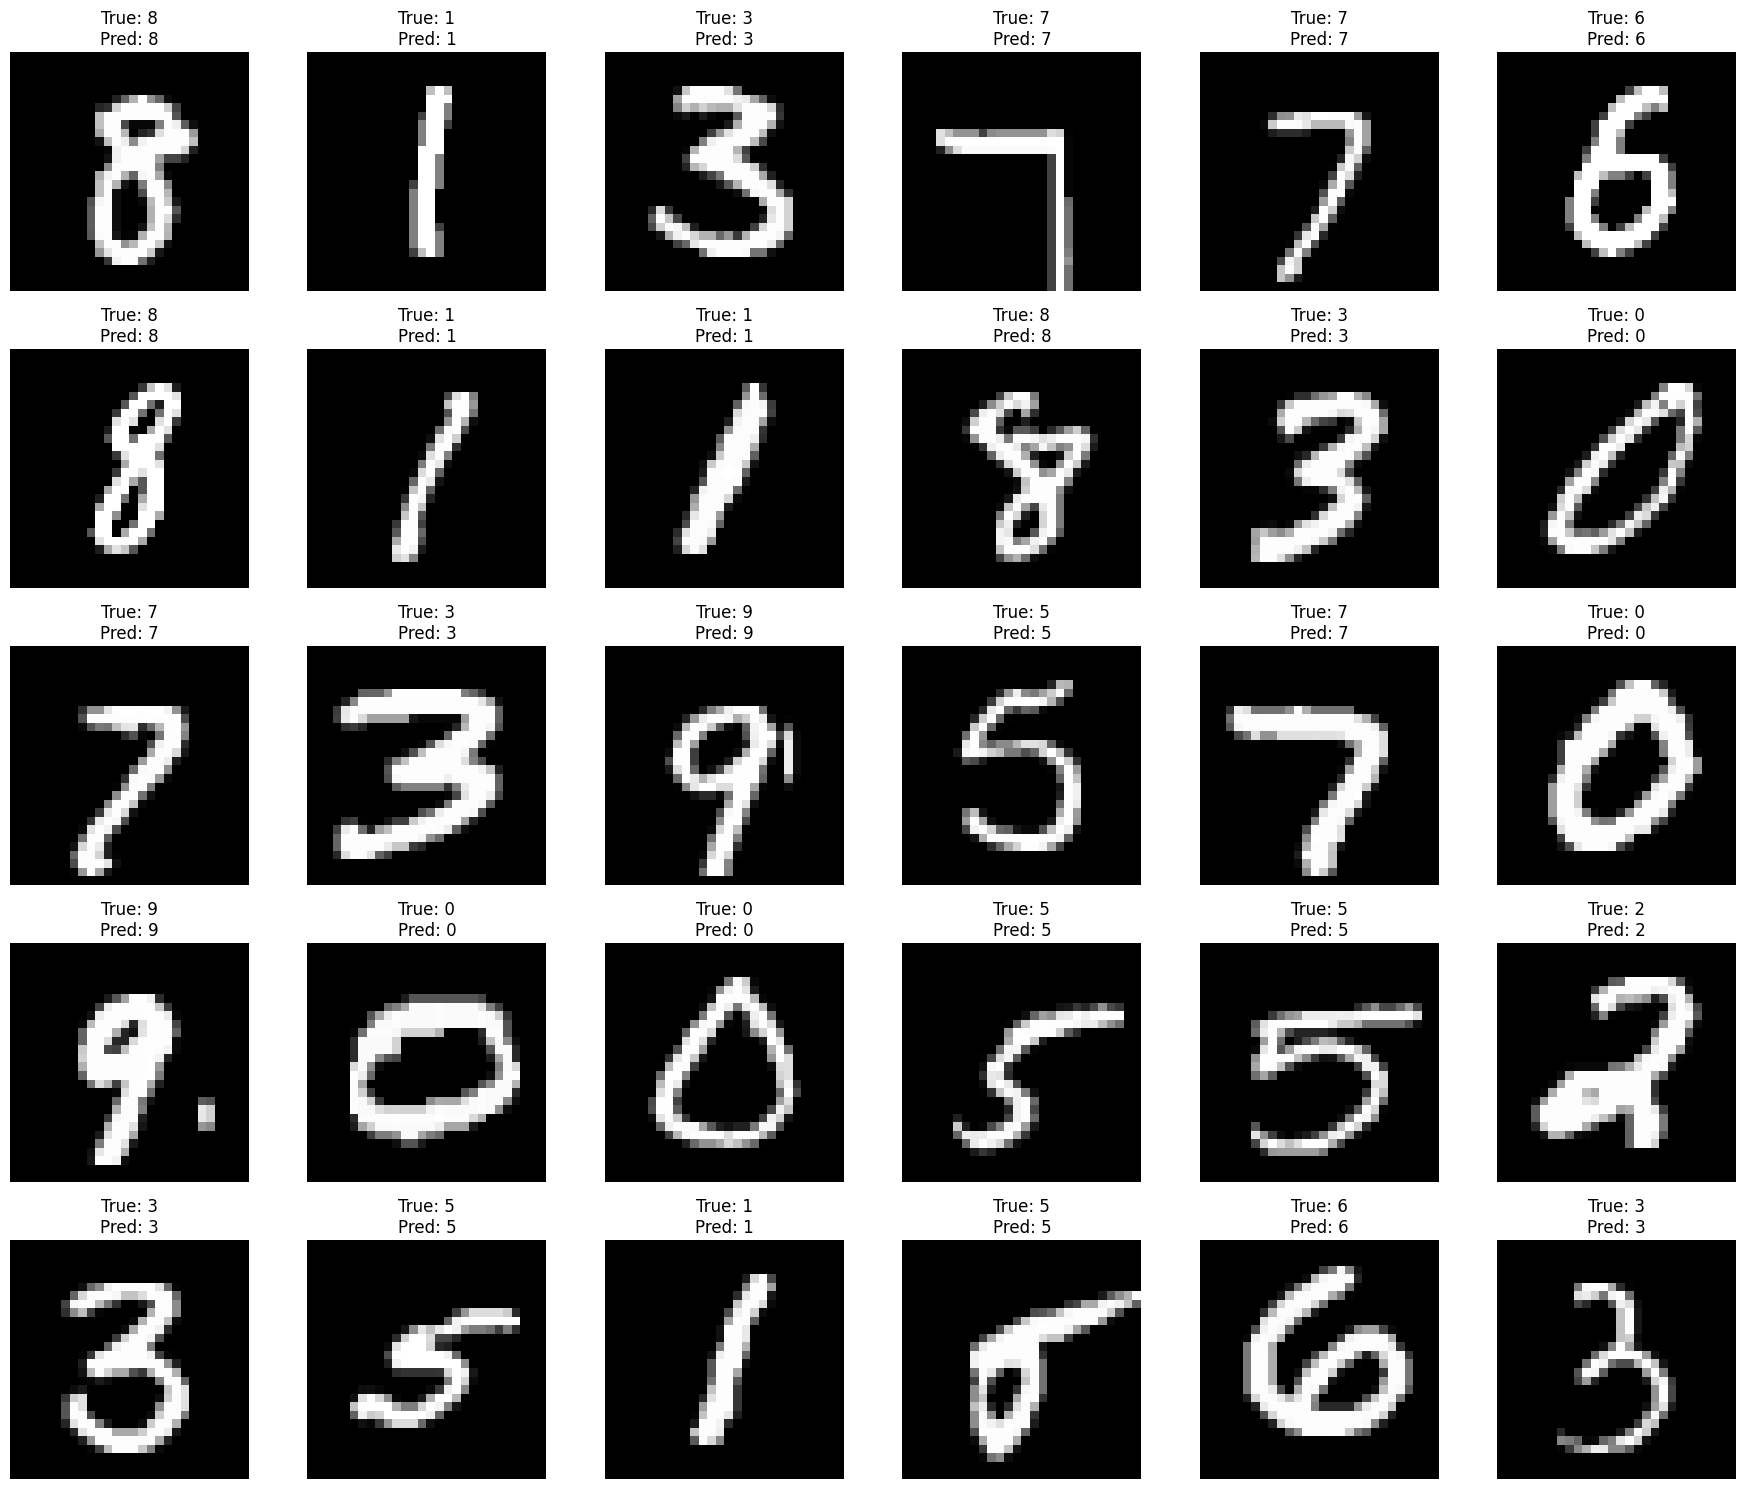

In [20]:
# Set the number of images to display
n = 30  # You can change this value to display any number of images

# Calculate grid dimensions (e.g., roughly square layout)
cols = int(np.ceil(np.sqrt(n)))  # Number of columns
rows = int(np.ceil(n / cols))  # Number of rows

# Select the images and labels
test_samples = test_images[:n]
true_labels = test_labels[:n]

# Predict the labels
predicted_probs = model.predict(test_samples)
predicted_labels = np.argmax(predicted_probs, axis=1)  # Get the class with the highest probability

# Display the test images with their true and predicted labels
plt.figure(figsize=(cols * 3, rows * 3))  # Adjust figure size based on the grid
for i in range(n):
    plt.subplot(rows, cols, i + 1)  # Arrange images in a grid
    plt.imshow(test_samples[i].reshape(28, 28), cmap='gray')  # Reshape and display the image
    plt.axis('off')  # Hide the axis
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")

plt.tight_layout()
plt.show()


Saving Screenshot 2024-12-10 230123.png to Screenshot 2024-12-10 230123.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


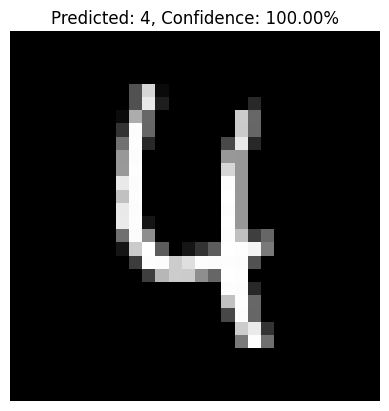

File: Screenshot 2024-12-10 230123.png
Predicted class: 4
Confidence: 100.00%


In [31]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload one image
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Step 1: Read the image
img = cv2.imread(filename)

# Step 2: Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Resize to 28x28 pixels (MNIST model input size)
resized_img = cv2.resize(gray_img, (28, 28))

# Step 4: Normalize the pixel values to [0, 1]
normalized_img = resized_img / 255.0

# Step 5: Reshape to add batch dimension and channel
input_image = normalized_img.reshape(1, 28, 28, 1)  # Shape: (1, 28, 28, 1)

# Step 6: Predict the digit using the model
prediction = model.predict([input_image])
predicted_class = np.argmax(prediction, axis=1)[0]  # Get the predicted class
confidence = prediction[0][predicted_class] * 100  # Get confidence score

# Display the image
plt.imshow(resized_img, cmap='gray')
plt.axis('off')
plt.title(f"Predicted: {predicted_class}, Confidence: {confidence:.2f}%")
plt.show()

# Print detailed results
print(f"File: {filename}")
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")
